In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Linear Regression

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Summer Training/ML/dataset-1.csv')
df = df.drop(df.columns[[8]], axis  = 1)
df = df.drop(index = df.index[22])
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49,12.65,39.57,4.08,587.95
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.92,11.10,37.26,2.66,392.42
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00,11.33,37.11,4.10,487.54
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30,13.71,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33,12.79,37.53,4.44,599.64


In [29]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,33.747091,12.386818,36.794091,3.588636,519.849545
std,1.196860,1.199748,1.840602,0.652426,87.161733
min,31.920000,10.370000,33.250000,2.450000,329.930000
25%,32.767500,11.335000,35.392500,3.127500,462.902500
50%,33.555000,12.565000,37.135000,3.620000,550.755000
75%,34.689500,13.405000,37.837500,4.155000,594.272500
max,35.890000,14.280000,39.740000,4.580000,634.180000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 22 non-null     object 
 1   Address               22 non-null     object 
 2   Avatar                22 non-null     object 
 3   Avg. Session Length   22 non-null     float64
 4   Time on App           22 non-null     float64
 5   Time on Website       22 non-null     float64
 6   Length of Membership  22 non-null     float64
 7   Yearly Amount Spent   22 non-null     float64
dtypes: float64(5), object(3)
memory usage: 1.5+ KB


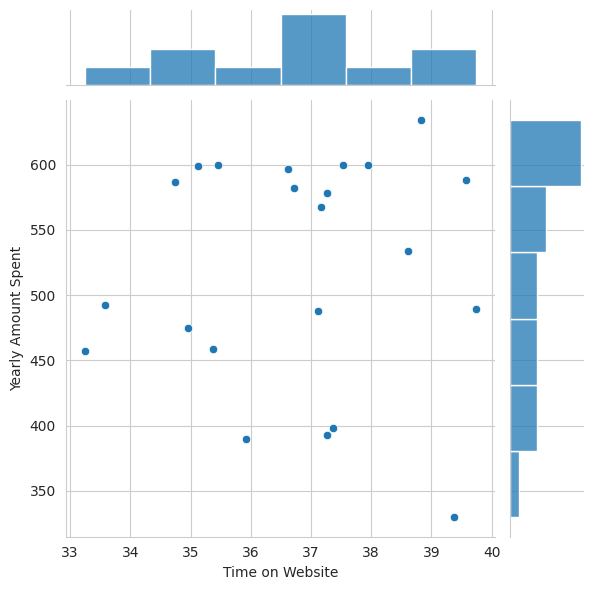

In [31]:
g = sns.JointGrid(data = df, x = 'Time on Website', y= 'Yearly Amount Spent')
g.plot(sns.scatterplot, sns.histplot)

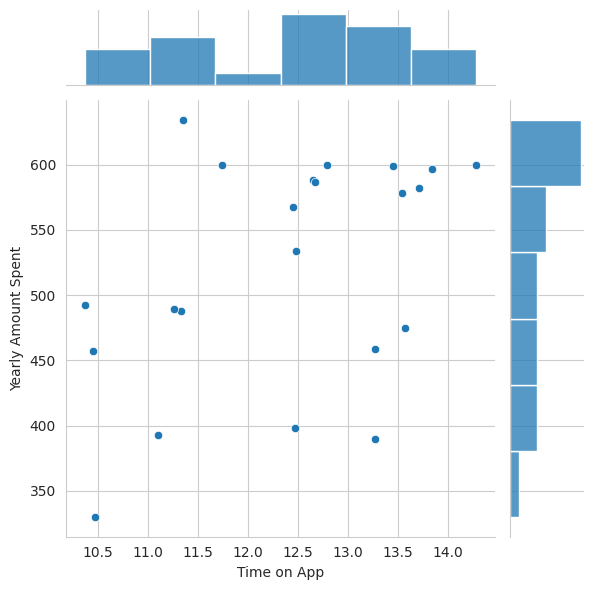

In [32]:
g = sns.JointGrid(data = df, x = 'Time on App', y= 'Yearly Amount Spent')
g.plot(sns.scatterplot, sns.histplot)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

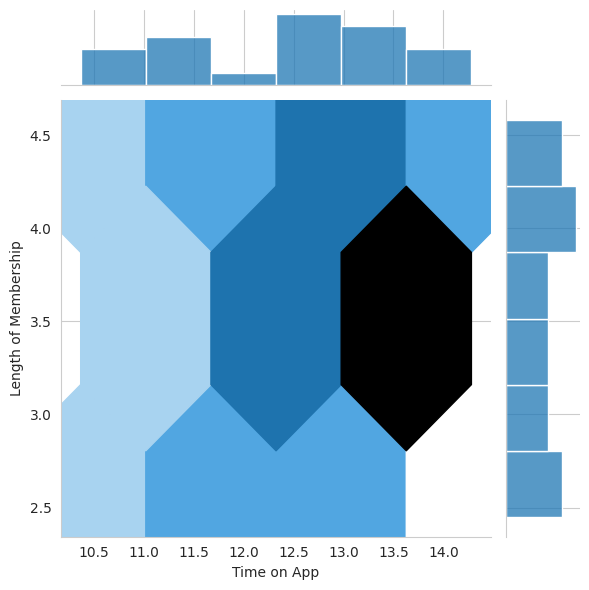

In [33]:
g = sns.jointplot(data = df, x = 'Time on App', y= 'Length of Membership', kind="hex")

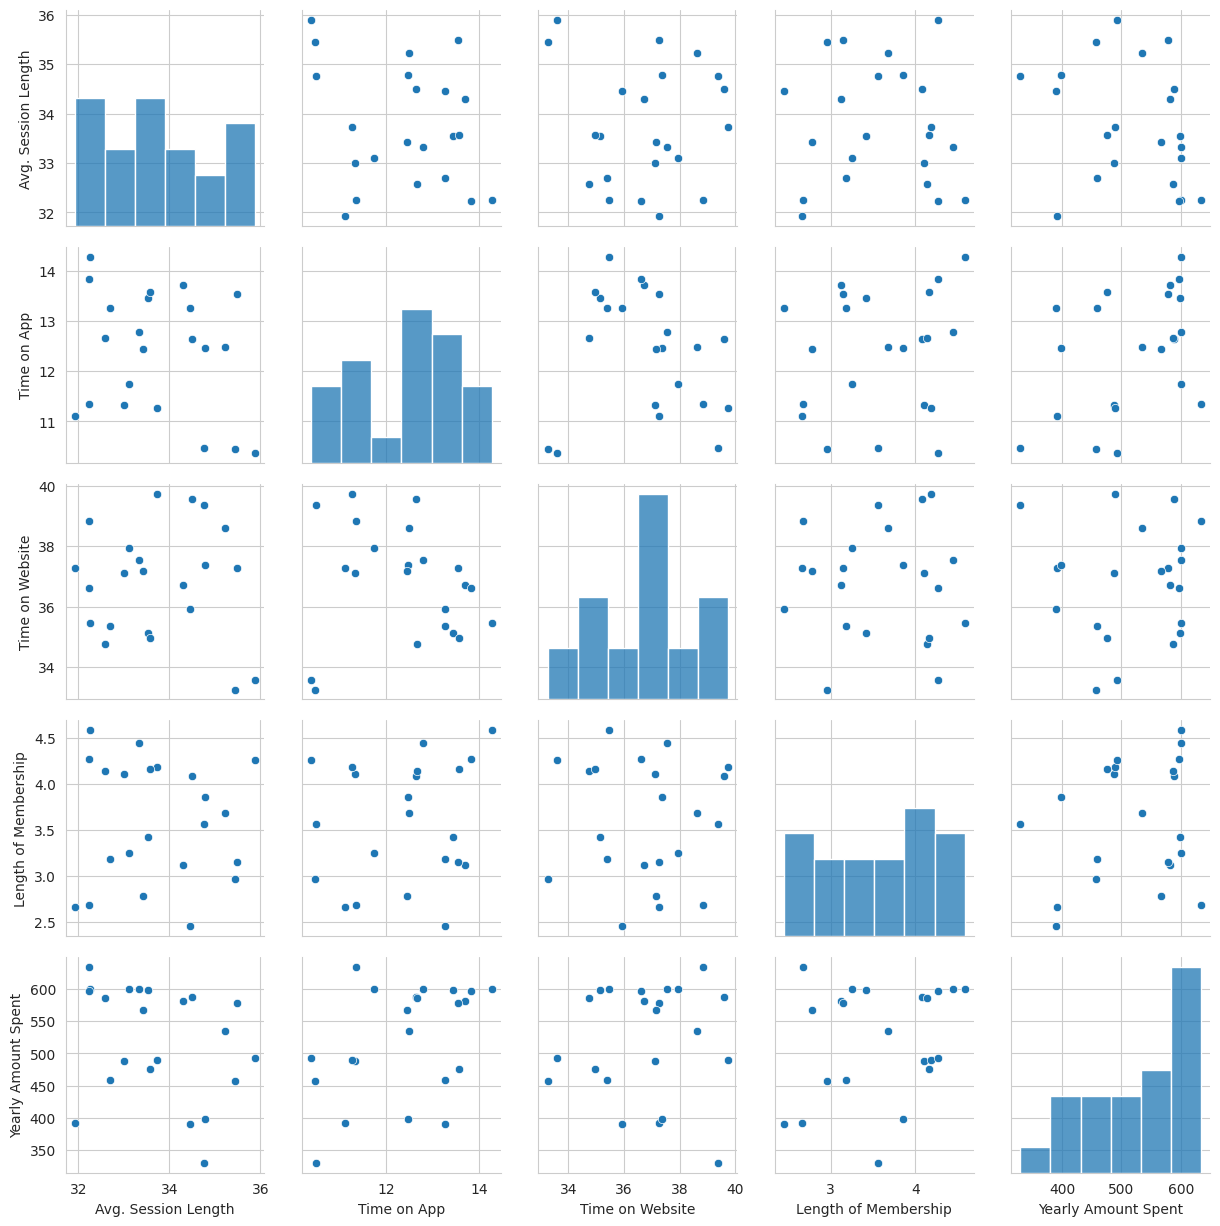

In [34]:
g = sns.PairGrid(data =df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

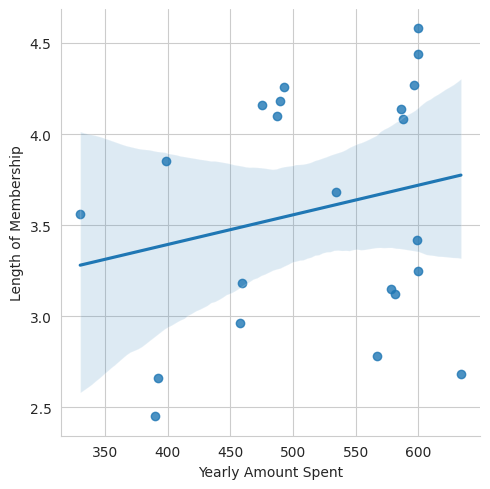

In [35]:
sns.set_style("whitegrid")
sns.lmplot(data=df, x="Yearly Amount Spent", y="Length of Membership")

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [36]:
X = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [37]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.490,12.65,39.57,4.08
1,31.920,11.10,37.26,2.66
2,33.000,11.33,37.11,4.10
3,34.300,13.71,36.72,3.12
4,33.330,12.79,37.53,4.44
5,32.250,14.28,35.46,4.58
6,35.480,13.54,37.26,3.15
7,32.580,12.67,34.75,4.14
8,33.540,13.45,35.12,3.42
9,35.450,10.45,33.25,2.96


In [38]:
y

0     587.95
1     392.42
2     487.54
3     581.85
4     599.64
5     600.02
6     578.54
7     586.36
8     598.86
9     457.32
10    398.47
11    489.26
12    596.38
13    600.12
14    492.64
15    389.75
16    534.15
17    634.18
18    475.12
19    567.36
20    329.93
21    458.83
Name: Yearly Amount Spent, dtype: float64

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
1,31.92,11.10,37.26,2.66
12,32.23,13.84,36.62,4.27
18,33.57,13.57,34.95,4.16
0,34.49,12.65,39.57,4.08
5,32.25,14.28,35.46,4.58
14,35.89,10.37,33.58,4.26
4,33.33,12.79,37.53,4.44
8,33.54,13.45,35.12,3.42
13,33.11,11.74,37.94,3.25
9,35.45,10.45,33.25,2.96


## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [42]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [43]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [44]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [45]:
print(lm.intercept_)
print(lm.coef_)

-248.07210567565767
[-1.31257805 12.61911111 14.43841382 38.29792225]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [46]:
y_pred = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

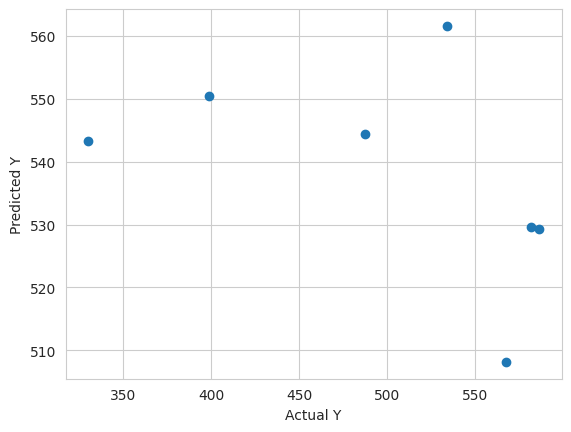

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.show()

## Evaluating the Model



In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 88.29997116869201
MSE: 11725.316780593896
RMSE: 108.28350188553146
